In [1]:
import cv2
import os 
from tqdm import tqdm
import numpy as np
from random import shuffle
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.layers import Dense, Dropout, Input, Conv2D, Flatten, MaxPooling2D, BatchNormalization, GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [4]:
TRAIN_DIR=r'D:\1Downloads\InfraredSolarModules-master\InfraredSolarModules-master\2020-02-14_InfraredSolarModules\InfraredSolarModules\images'
TEST_DIR='D://ML/Datasets/dogs-vs-cats/test1/test1'

In [5]:
IMG_SIZE=50
LR=0.001
#LR=1e-3

MODEL_NAME='dogsvscats-{}-{}.model'.format(LR,'2conv-basic')

In [6]:
import json

# Opening JSON file
f = open(r'D:\1Downloads\InfraredSolarModules-master\InfraredSolarModules-master\2020-02-14_InfraredSolarModules\InfraredSolarModules\module_metadata.json',)

# returns JSON object as
# a dictionary
data = json.load(f)

# Iterating through the json
# list
# for i in range(0, 19999):
#     print(data[str(i)])
print(data['13357']['anomaly_class'])
# Closing file
f.close()

No-Anomaly


In [7]:
import json

# Opening JSON file
f = open(r'D:\1Downloads\InfraredSolarModules-master\InfraredSolarModules-master\2020-02-14_InfraredSolarModules\InfraredSolarModules\module_metadata.json',)

# returns JSON object as
# a dictionary
data = json.load(f)

def label_img(img):
    label=img.split('.')[0]
    label=data[label]['anomaly_class']
    if(label=='Cell'):
         return [0]
    if(label=='Cell-Multi'):
         return [1]
    if(label=='Cracking'):
         return [2]
    if(label=='Hot-Spot'):
         return [3]
    if(label=='Hot-Spot-Multi'):
         return [4]
    if(label=='Shadowing'):
         return [5]
    if(label=='Diode'):
         return [6]
    if(label=='Diode-Multi'):
         return [7]
    if(label=='Vegetation'):
         return [8]
    if(label=='Soiling'):
         return [9]
    if(label=='Offline-Module'):
         return [10]
    if(label=='No-Anomaly'):
         return [11]
    

In [8]:
def create_train_data():
    training_data=[]
    for img in tqdm(os.listdir(TRAIN_DIR)):
        label=label_img(img)
        path=os.path.join(TRAIN_DIR, img)
        img=cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img=cv2.resize(img,(40, 24))
        training_data.append([np.array(img),np.array(label)])
    shuffle(training_data)
    return training_data

In [9]:
def process_test_data():
    testing_data=[]
    for img in tqdm(os.listdir(TEST_DIR)):
        path=os.path.join(TEST_DIR,img)
        img_num=img.split('.')[0]
        img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img=cv2.resize(img,(24,40))
        testing_data.append([np.array(img),img_num])
    shuffle(testing_data)
    return testing_data

In [10]:
#test_data=process_test_data()

In [11]:
train_data=create_train_data()

100%|██████████████████████████████████████████████████████████████████████████| 20000/20000 [00:05<00:00, 3616.23it/s]


In [12]:
x = train_data[:-5000]
y = train_data[-5000:]

In [13]:
print(len(train_data),len(train_data[:-5000]),len(train_data[-5000:])) #indexing in list starts from -1 from end

20000 15000 5000


In [14]:
x[0][0].shape

(24, 40)

In [15]:
#Separating features and labels in training and testing set created from main training dataset

x_train = np.array([i[0] for i in x]).reshape(-1,24, 40,1)
y_train = np.array([i[1] for i in x])

In [16]:
x_test = np.array([i[0] for i in y]).reshape(-1,24, 40,1)
y_test = np.array([i[1] for i in y])

In [17]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(15000, 24, 40, 1) (15000, 1) (5000, 24, 40, 1) (5000, 1)


In [18]:
x_train, x_test=x_train/255.0, x_test/255.0
y_train, y_test=y_train.flatten(), y_test.flatten()

In [19]:
print(y_train.shape)

(15000,)


In [20]:
x_train[0]

array([[[0.61960784],
        [0.63529412],
        [0.6627451 ],
        [0.68627451],
        [0.70196078],
        [0.71372549],
        [0.71764706],
        [0.72156863],
        [0.7254902 ],
        [0.7254902 ],
        [0.72156863],
        [0.71764706],
        [0.71764706],
        [0.7254902 ],
        [0.72941176],
        [0.7254902 ],
        [0.7254902 ],
        [0.7254902 ],
        [0.7254902 ],
        [0.7254902 ],
        [0.7254902 ],
        [0.7254902 ],
        [0.7254902 ],
        [0.7254902 ],
        [0.72156863],
        [0.72156863],
        [0.72156863],
        [0.7254902 ],
        [0.7254902 ],
        [0.7254902 ],
        [0.7254902 ],
        [0.7254902 ],
        [0.71764706],
        [0.71372549],
        [0.70588235],
        [0.70196078],
        [0.68627451],
        [0.67058824],
        [0.65098039],
        [0.63921569]],

       [[0.66666667],
        [0.68627451],
        [0.71372549],
        [0.74117647],
        [0.76078431],
        

In [21]:
print(x_train[0].shape)

(24, 40, 1)


In [22]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)


#x = Flatten()(x)
x = GlobalMaxPooling2D()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(12,activation='softmax')(x)

model = Model(i,x)

In [23]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [24]:
x_train.shape[0]

15000

In [25]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train,y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size

In [26]:
r = model.fit_generator(train_generator, validation_data=(x_test,y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 468 steps, validate on 5000 samples
Epoch 1/50
468/468 [==============================] - 56s 119ms/step - loss: 1.5193 - accuracy: 0.5537 - val_loss: 1.5255 - val_accuracy: 0.5486
Epoch 2/50
468/468 [==============================] - 52s 110ms/step - loss: 1.2385 - accuracy: 0.6251 - val_loss: 1.1457 - val_accuracy: 0.6586
Epoch 3/50
468/468 [==============================] - 47s 101ms/step - loss: 1.1423 - accuracy: 0.6474 - val_loss: 1.1039 - val_accuracy: 0.6642
Epoch 4/50
468/468 [==============================] - 45s 96ms/step - loss: 1.0722 - accuracy: 0.6656 - val_loss: 1.7389 - val_accuracy: 0.5738
Epoch 5/50
468/468 [==============================] - 44s 94ms/step - loss: 1.0234 - accuracy: 0.6778 - val_loss: 1.2300 - val_accuracy: 0.6118
Epoch 6/50
468/468 [==============================] - 47s 100ms/step - loss: 0.9876 - accuracy: 0.6903 - val_loss: 1.3277 - val_ac

In [27]:
model.save("my_model_with_datagen_withglobal")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: my_model_with_datagen_withglobal\assets


In [28]:
print("Training result: ",model.evaluate(x_train,y_train))
print("Testing result: ",model.evaluate(x_test,y_test))

15000/15000 [==============================] - 5s 341us/sample - loss: 1.2041 - accuracy: 0.6185
Training result:  [1.2040729483922323, 0.6185333]
5000/5000 [==============================] - 2s 340us/sample - loss: 1.2556 - accuracy: 0.6084
Testing result:  [1.2556402526855468, 0.6084]


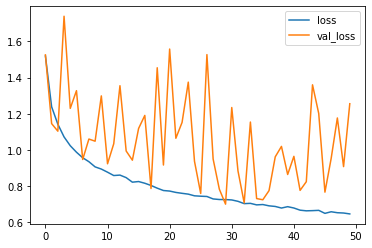

In [29]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

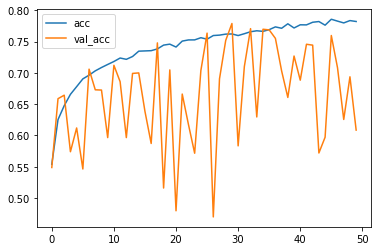

In [30]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()

In [31]:
TEST_DIR=r'D:\1Downloads\Internship_D1'

In [32]:
def process_test_data():
    testing_data=[]
    for img in tqdm(os.listdir(TEST_DIR)):
        path=os.path.join(TEST_DIR,img)
        img_num=img.split('.')[0]
        img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img=cv2.resize(img,(24,40))
        testing_data.append([np.array(img),img_num])
    shuffle(testing_data)
    return testing_data

In [33]:
test_data=process_test_data()

  7%|█████▌                                                                             | 1/15 [00:00<00:06,  2.03it/s]


error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-2b5g8ysb\opencv\modules\imgproc\src\resize.cpp:3929: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [ ]:
x = train_data[:]

In [ ]:
x_test1 = np.array([i[0] for i in x]).reshape(-1,24, 40,1)

In [ ]:
p_test=model.predict(x_test1).argmax(axis=1)
p_test

In [ ]:
label=data[label]['anomaly_class']
if(label=='Cell'):
     return [0]
if(label=='Cell-Multi'):
     return [1]
if(label=='Cracking'):
     return [2]
if(label=='Hot-Spot'):
     return [3]
if(label=='Hot-Spot-Multi'):
     return [4]
if(label=='Shadowing'):
     return [5]
if(label=='Diode'):
     return [6]
if(label=='Diode-Multi'):
     return [7]
if(label=='Vegetation'):
     return [8]
if(label=='Soiling'):
     return [9]
if(label=='Offline-Module'):
     return [10]
if(label=='No-Anomaly'):
     return [11]

In [ ]:
missclassified_idx=np.where(p_test!=y_test)[0]
missclassified_idx

In [ ]:
i=np.random.choice(missclassified_idx)
plt.imshow(x_test[i].reshape(50,50),cmap='gray')
plt.title("True label: %s, Predicted label: %s" %(labels[y_test[i]],labels[p_test[i]]))

In [ ]:
path="D://Downloads/test.jpg"

In [ ]:
image=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
image=cv2.resize(image,(50,50))/255.0

In [ ]:
image=np.array(image).reshape(-1,50,50,1)
image.shape

In [ ]:
pred=model.predict(image).argmax(axis=1)
print(labels[pred[0]])

In [ ]:
import matplotlib.pyplot as plt

# if you need to create the data:
#test_data = process_test_data()
# if you already have some saved:
#test_data = np.load('test_data.npy')

fig=plt.figure()

for num,data in enumerate(test_data[:12]):
    # cat: [1,0]
    # dog: [0,1]
    
    img_num = data[1]
    img_data = data[0]
    
    y = fig.add_subplot(3,4,num+1)
    orig = img_data
    data = img_data.reshape(IMG_SIZE,IMG_SIZE,1)
    #model_out = model.predict([data])[0]
    model_out = model.predict([data])[0]
    
    if np.argmax(model_out) == 1: str_label='Dog'
    else: str_label='Cat'
        
    y.imshow(orig,cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()